# Logistic Regresion + NeuralNet

## 1. Logistic Regression

- Mo hình này thuờng đuợc sử dụng khi dữ liệu có the phan chia theo mot duong thang (tuyen tinh)

## Generate dữ liệu 

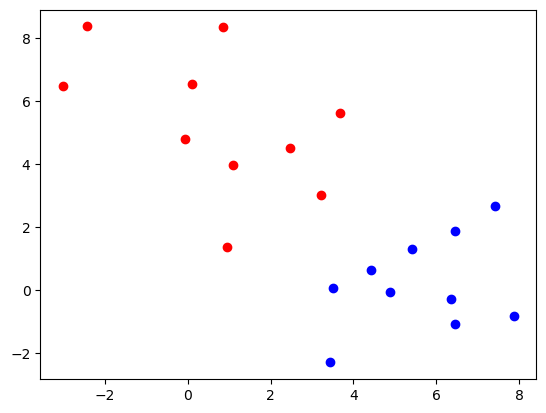

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 10
"""sai số: 2.0 --> Càng lớn thì các điểm càng gần nhau,các điểm ngẫu nhiênphân bố chuẩn - 2: 2 chiều --> X có 2 thành phần"""
X_red = np.random.normal(0.0, 2.0, size=(n_samples, 2)) + np.array([1, 5]) # xoay xung quanh điểm [1, 5]
X_blue = np.random.normal(0.0, 2.0, size=(n_samples, 2)) + np.array([5, 1]) # xoay xung quanh điểm [5, 1]
plt.plot(X_red[:, 0], X_red[:, 1], 'ro', label='red')
plt.plot(X_blue[:, 0], X_blue[:, 1], 'bo', label='blue')


In [15]:
# Dữ liệu train sẽ bao gồm cả 2 tập xanh và đó
X = np.concatenate((X_red, X_blue))
y = [0]*n_samples + [1]*n_samples # 0 là đỏ, 1 là xanh


In [18]:
print(X)
print(X.shape)


[[ 3.22674325  3.00738703]
 [-3.01556525  6.48539903]
 [ 0.9550539   1.36705646]
 [-2.43798697  8.35759337]
 [ 3.67897937  5.60064352]
 [ 0.85527165  8.35152613]
 [ 0.0987303   6.52034115]
 [ 1.0849407   3.97470121]
 [ 2.46499079  4.51276178]
 [-0.07445344  4.80187878]
 [ 5.4217954   1.29127745]
 [ 6.46102474 -1.06140844]
 [ 7.42284248  2.66865512]
 [ 6.44599153  1.89078445]
 [ 6.36395904 -0.29098774]
 [ 4.88098469 -0.05420021]
 [ 7.86836076 -0.82067207]
 [ 3.44551447 -2.28880808]
 [ 4.4323232   0.65625987]
 [ 3.5188482   0.07843122]]
(20, 2)


In [20]:
y # mảu đỏ - nhãn 0, màu xành - nhãn 1


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

# Build model

In [22]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X, y)


LogisticRegression()

# Trực quan hóa với kết quả thư viện sklearn

In [ ]:
logistic.coef_ # hệ số hồi quy logistic [x1, x2] --> 2 chiều [chiều ngang, chiều dọc]


array([[ 1.00675395, -0.96303991]])

In [26]:
logistic.intercept_ # bias


array([-1.58724631])

Khi nhìn vô hệ số có biêế đung hay ko ==> trưng quan hóa mô hình ==> Vẽ dth tạo bởi 2 đuờng thẳng

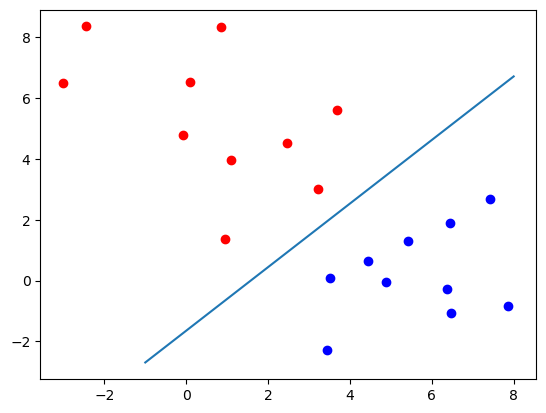

In [43]:
# B1: Vẽ lại các điểm huấn luyện
plt.plot(X_red[:, 0], X_red[:, 1], 'ro', label='red')
plt.plot(X_blue[:, 0], X_blue[:, 1], 'bo', label='blue')

# B2: Vẽ hàm mô hình- PT đường thẳng: w1 x1 + w2 x2 + bias = 0 ==> x2 phụ thuộc x1
w1 = logistic.coef_[0][0] # thành phần x1
w2 = logistic.coef_[0][1] # thành phần x2
bias = logistic.intercept_[0] 

def cal_x2(x1):
    return (-w1*x1 - bias) / w2 

# vẽ 2 điểm là -1 và -8
plt.plot([-1, 8], [cal_x2(-1), cal_x2(8)])


# Đánh giá mô hình

In [46]:
y_pred = logistic.predict(X)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy) 


Accuracy: 1.0


In [47]:
# Cách tính độ chính xác khác ko dùng hàm (ko dùng for)
sum(y_pred == y) / len(y)


1.0

# Truờng hợp dữ liệu phi tuyến

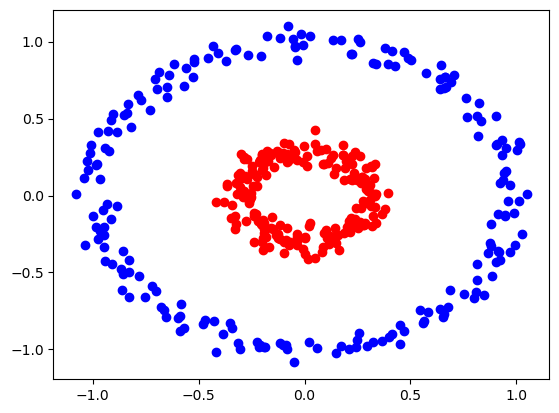

In [57]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=400, factor=.3, noise=.05)

# visualize the data
plt.plot(X[y == 0, 0], X[y == 0, 1], 'bo', label='blue')
plt.plot(X[y == 1, 0], X[y == 1, 1], 'ro', label='red')


# Build model

In [58]:
logistic = LogisticRegression()
logistic.fit(X, y)


LogisticRegression()

# Trưc quan hóa dữ liệu phi tuyến


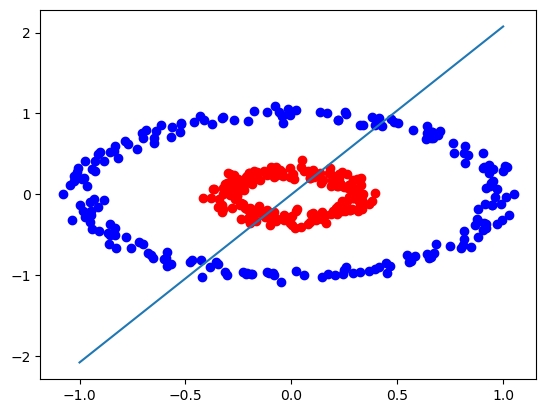

In [59]:
# visualize data
plt.plot(X[y == 0, 0], X[y == 0, 1], 'bo', label='blue')
plt.plot(X[y == 1, 0], X[y == 1, 1], 'ro', label='red')

# vẽ hàm mô hình
w1 = logistic.coef_[0][0]
w2 = logistic.coef_[0][1]
bias = logistic.intercept_[0]

def cal_x2(x1):
    return (-w1 * x1 - bias) / w2

plt.plot([-1, 1], [cal_x2(-1), cal_x2(1)])


# Tính accuracy

In [60]:
from sklearn.metrics import accuracy_score
y_pred = logistic.predict(X)
print("Accuracy:", accuracy_score(y, y_pred))


Accuracy: 0.505


# Quay lại Bước `feature engineering`

- tạo thêm đặc trưng mới
  - x1 ==> x1^2
  - x2 ==> x2^2
  -    ==> x1 * x2

In [ ]:
X_new = np.hstack((X, (X[:, 0]**2).reshape(X.shape[0], 1))) # X: cũ, X[:, 0]: X1 cũ
X_new = np.hstack((X_new, (X[:, 1]**2).reshape(X.shape[0], 1))) # X: cũ, X[:, 1]: X2 cũ
X_new = np.hstack((X_new, (X[:, 0] * X[:, 1]).reshape(X.shape[0], 1))) # X[:, 0] * X[:, 1] ==> X1 * X2

X_new.shape 
# 5 feature: X1, X2, X1^2, X2^2, X1 * X2


(400, 5)

# build model

In [66]:
logistic = LogisticRegression()
logistic.fit(X_new, y) # X mới có 5 feature


LogisticRegression()

In [69]:
y_pred = logistic.predict(X_new)
print("Accuracy: ",accuracy_score(y, y_pred))


Accuracy:  1.0


==> Nêu ko đủ tri thức để thay dạng mô hình đẻ thêm feaure engineering ==> Dung Neural Network cho dữ liệu phi tuyến

# Sử dụng mạng Neural Network cho dữ liêu phi tuyến

In [ ]:
from sklearn.neural_network import MLPClassifier # multi-layer perceptron classifier

params = {
    'hidden_layer_sizes': [10], # 1 lớp ảnh - 10 nơ-ron
    'activation': 'logistic', # hàm kích hoạt là logistic regression
    'solver': 'adam', # thuật toán tối ưu hóa
    'alpha': 0.00, # tham số điều chỉnh độ phức tạp của mô hình
    'batch_size':100,
    'random_state': 0,
    'tol':0.0001, # sai số tối đa cho việc dừng thuật toán
    'nesterovs_momentum': False, # có sử dụng nesterov momentum hay không
    'learning_rate': 'constant', # tốc độ học không thay đổi
    'learning_rate_init': 0.01, # tốc độ học ban đầu
    'max_iter': 100000, # số lần lặp tối đa
    'shuffle': True, # có trộn dữ liệu hay không
    'n_iter_no_change': 50, # số lần lặp không thay đổi
    'verbose': False # có in ra thông tin hay không
}

net = MLPClassifier(**params) # khởi tạo mạng nơ-ron với các tham số đã định nghĩa ở trên


In [72]:
# Sau khi khai báo ==> fit trên data cũ vì X_new đã có đặc trưng đã engineered
# Dùng raw data ==> Chưa có tri thức gì về mô hình để feature engineering
net.fit(X, y)


MLPClassifier(activation='logistic', alpha=0.0, batch_size=100,
              hidden_layer_sizes=[10], learning_rate_init=0.01, max_iter=100000,
              n_iter_no_change=50, nesterovs_momentum=False, random_state=0)

# Đánh giá neural network

In [73]:
net.score(X, y)


1.0

In [ ]:
net.intercepts_ # bias của các nơ-ron trong lớp đầu tiên

# 10 no-ron ==> 10 bias cho layer ở giữa
# 1 no-ron ==> 1 bias cho layer đầu tiên


[array([ 1.98915553,  4.07531359, -4.992948  ,  1.90225686, -4.69895316,
         4.25793398,  1.3176928 ,  4.83784507, -2.63464521, -4.60453457]),
 array([-1.35915415])]

In [ ]:
net.coefs_ # trọng số của các nơ-ron trong lớp đầu tiên


[array([[ 0.25219533,  7.85005956,  6.22343761,  0.26807644,  6.22601815,
         -0.9271073 ,  0.35831441, 10.51106897,  1.99865795, -7.81927492],
        [-0.07839717, -2.93884825,  8.39597816, -0.067133  , -7.36122085,
         -9.79025879, -0.08394671,  0.54389507, -5.46968527, -4.7031871 ]]),
 array([[-1.7154699 ],
        [ 2.19363511],
        [-6.31902961],
        [-1.50225368],
        [-8.18663876],
        [ 4.36457224],
        [-1.56793517],
        [ 5.05403273],
        [-2.02122186],
        [-4.14904362]])]

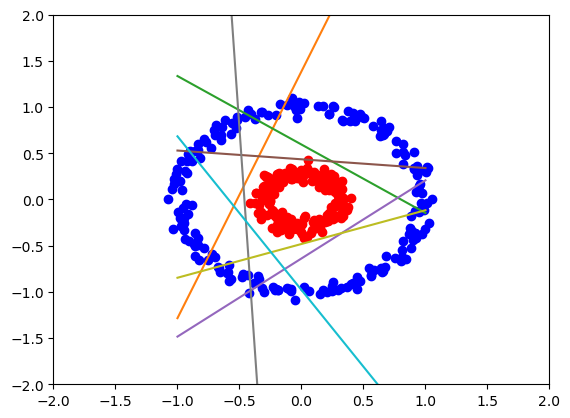

In [78]:
# visualize các node trong mang Neural Network sau khi đã học từ dữ liệu
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.plot(X[y == 0, 0], X[y == 0, 1], 'bo', label='blue')
plt.plot(X[y == 1, 0], X[y == 1, 1], 'ro', label='red')

# Layer muốn visualize là layer đầu tiên
layer = 0

for nodeID in range(len(net.intercepts_[0])):
    w1 = net.coefs_[layer][0][nodeID] # trọng số của nơ-ron thứ nodeID trong lớp đầu tiên
    w2 = net.coefs_[layer][1][nodeID] # trọng số của nơ-ron thứ nodeID trong lớp đầu tiên
    b = net.intercepts_[layer][nodeID] # bias của nơ-ron thứ nodeID trong lớp đầu tiên
    
    plt.plot([-1, 1], [-w1/w2*(-1)-b/w2, -w1/w2*(1)-b/w2]) 
    # 1 noron --> 1 đường thẳng logistic regression --> 1 weak classifier
    # vì weak ==> Phối hợp nhiều noron --> nhiều đường thẳng ==> strong classifier
